### IMPORTING THE LIBRARIES

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



### LOADING THE DATA

In [143]:
data = pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### BASIC CHECKS

In [144]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [145]:
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [146]:
data.shape

(576, 6)

The dataset contains                                                                                                           
rows = 576                                                                                                                    
columns = 6

In [147]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

### CHECKING THE DATA TYPES OF EACH COLUMNS

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


### CHECKING FOR MISSING VALUES

In [149]:
data.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

-->there are no missing values in the dataset

In [150]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [151]:
#Renaming the columns since there are not in the readable manner
data.rename({'Unnamed: 0':"ID", 'Months since Last Donation':"LastDonation_Month", 'Number of Donations':"TotalDonations",
       'Total Volume Donated (c.c.)':"DonatedBlood_Volume",'Months since First Donation':"FirstDonation_Month",
       'Made Donation in March 2007':"Target"},axis=1,inplace=True)

In [152]:
data.columns

Index(['ID', 'LastDonation_Month', 'TotalDonations', 'DonatedBlood_Volume',
       'FirstDonation_Month', 'Target'],
      dtype='object')

In [153]:
#checking the target column
data.Target.unique()

array([1, 0], dtype=int64)

In [154]:
data.Target.value_counts()

Target
0    438
1    138
Name: count, dtype: int64

In [155]:
#the dataset is highly imbalanced

### EXPLORATORY DATA ANALYSIS

In [156]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


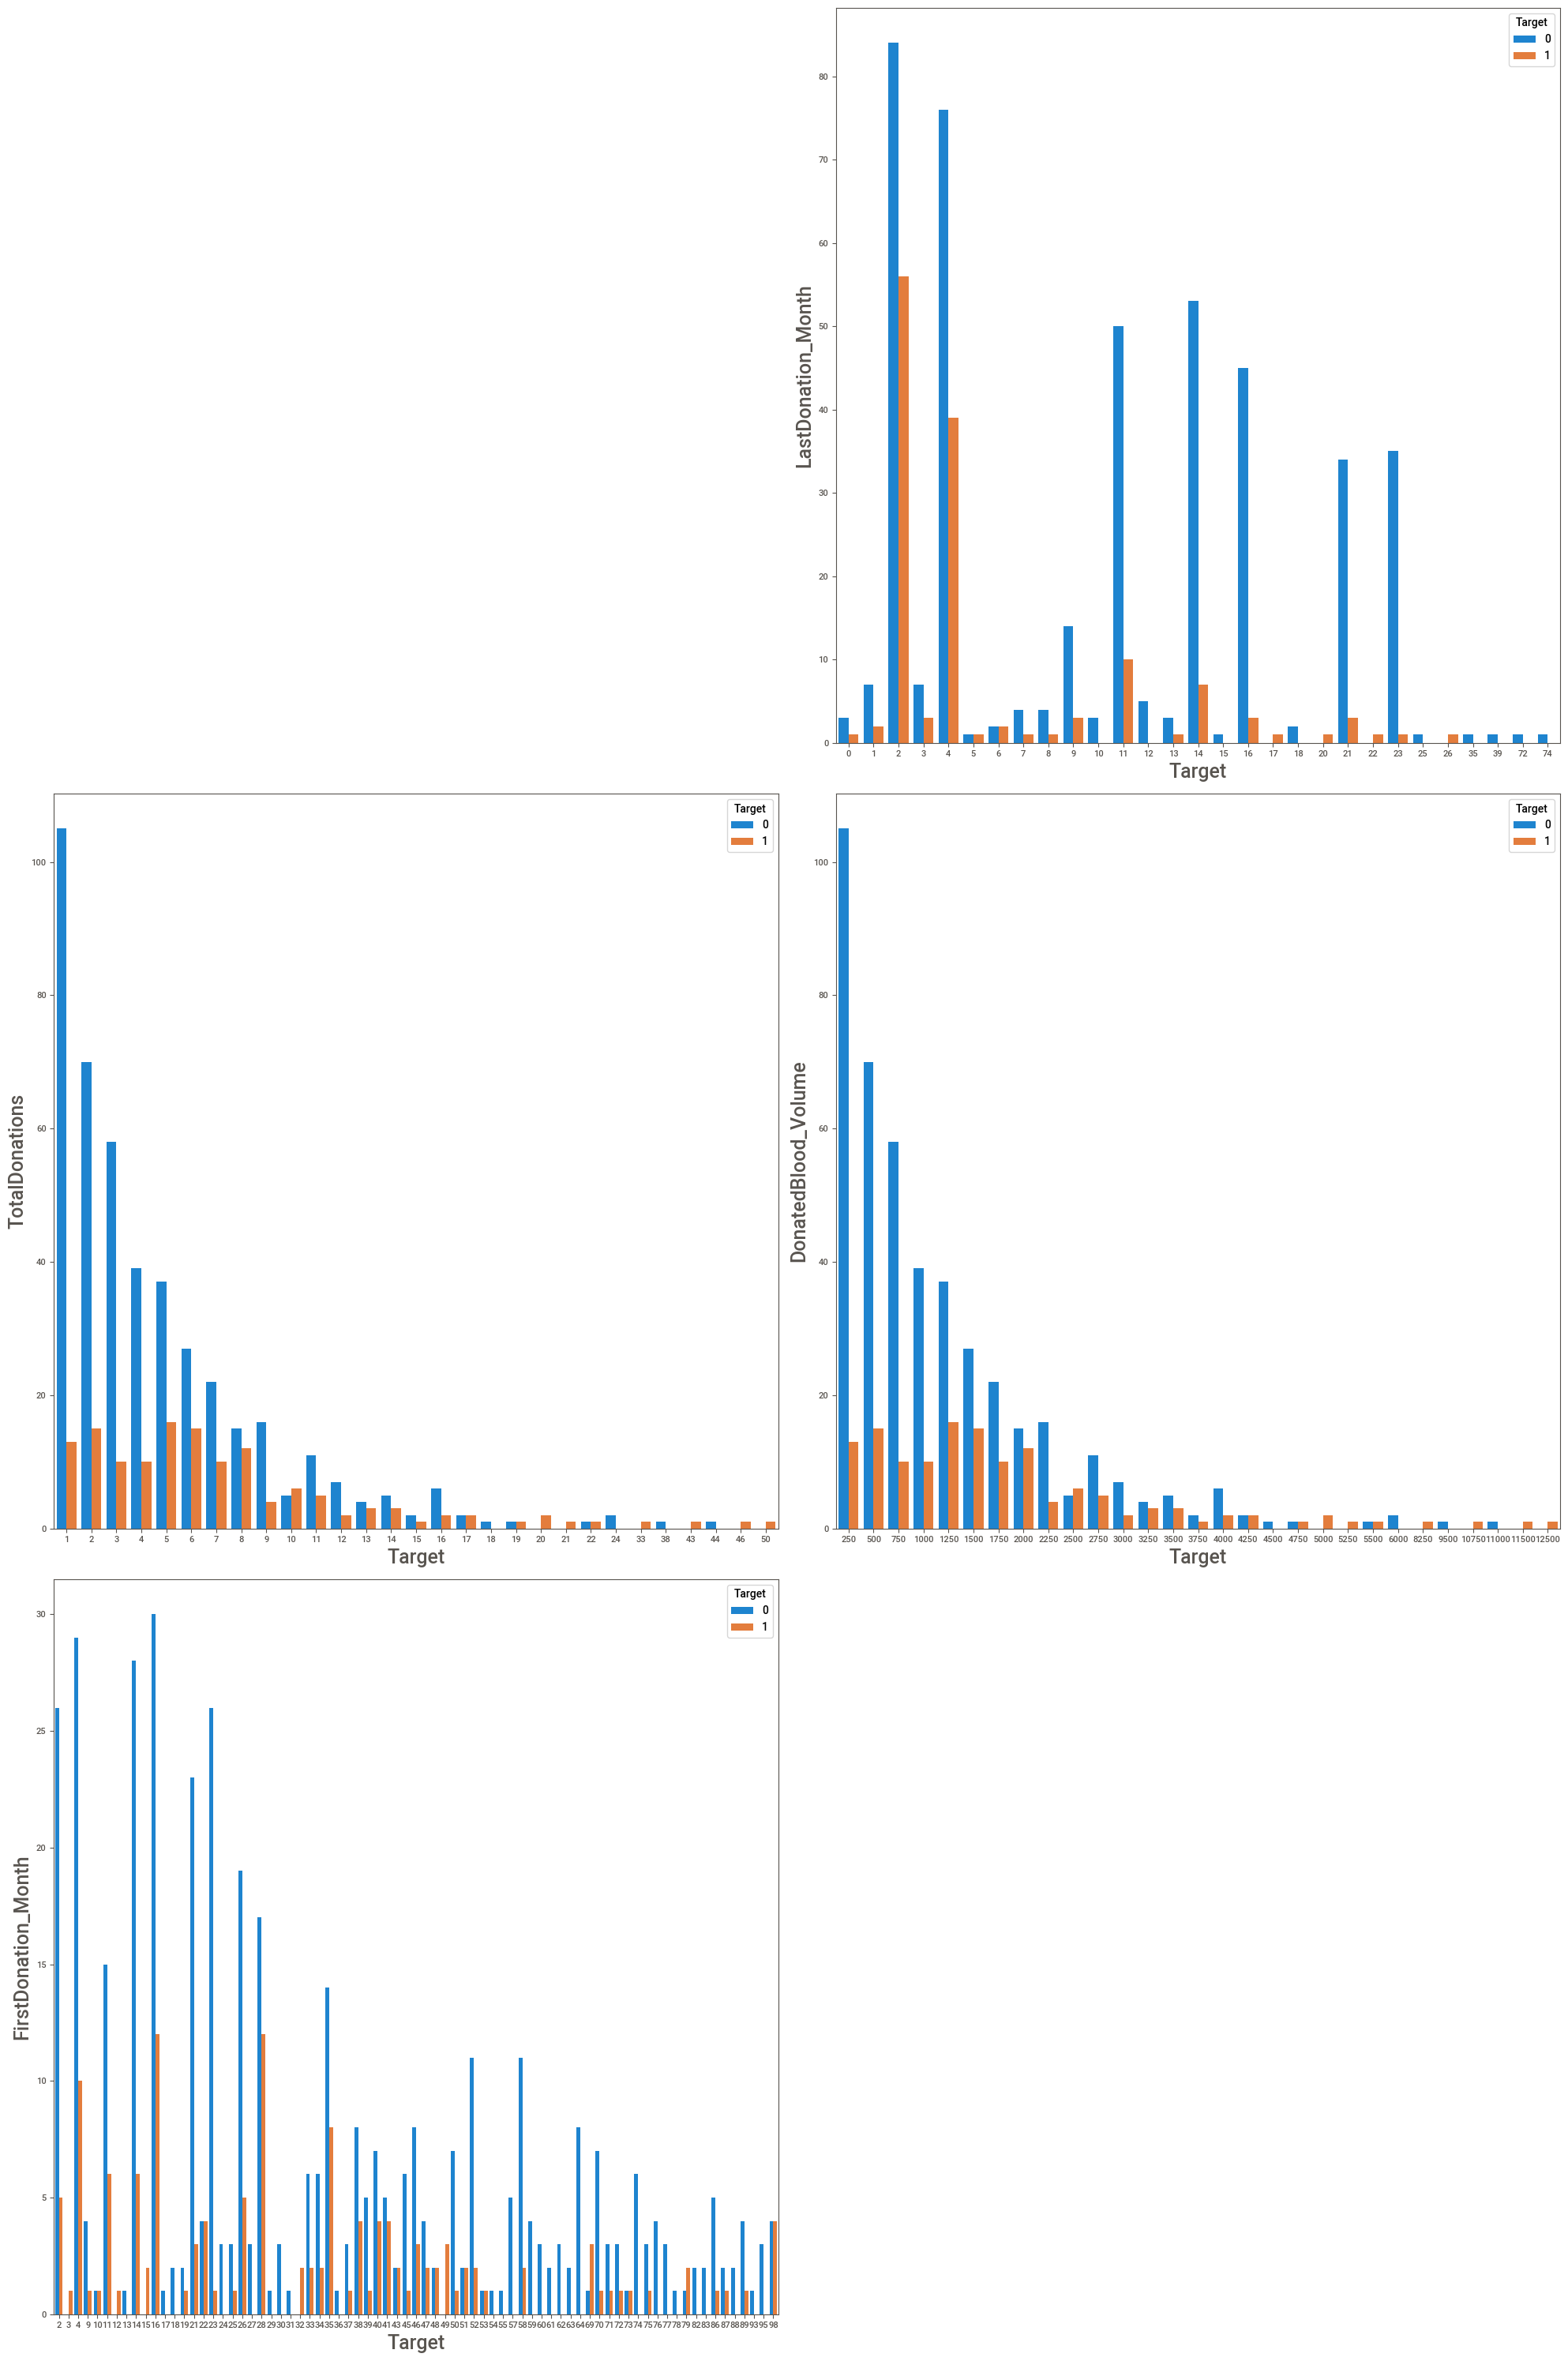

In [157]:
#comparing all the columns with the target column except ID column
plt.figure(figsize =(20,30),facecolor = 'white')
plotnumber = 1
for i in data:
    if i != 'ID' and i != 'Target':
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=i,hue= 'Target',data=data)
        plt.ylabel(i,fontsize=18)
        plt.xlabel('Target',fontsize=18)
    plotnumber+=1
plt.tight_layout()

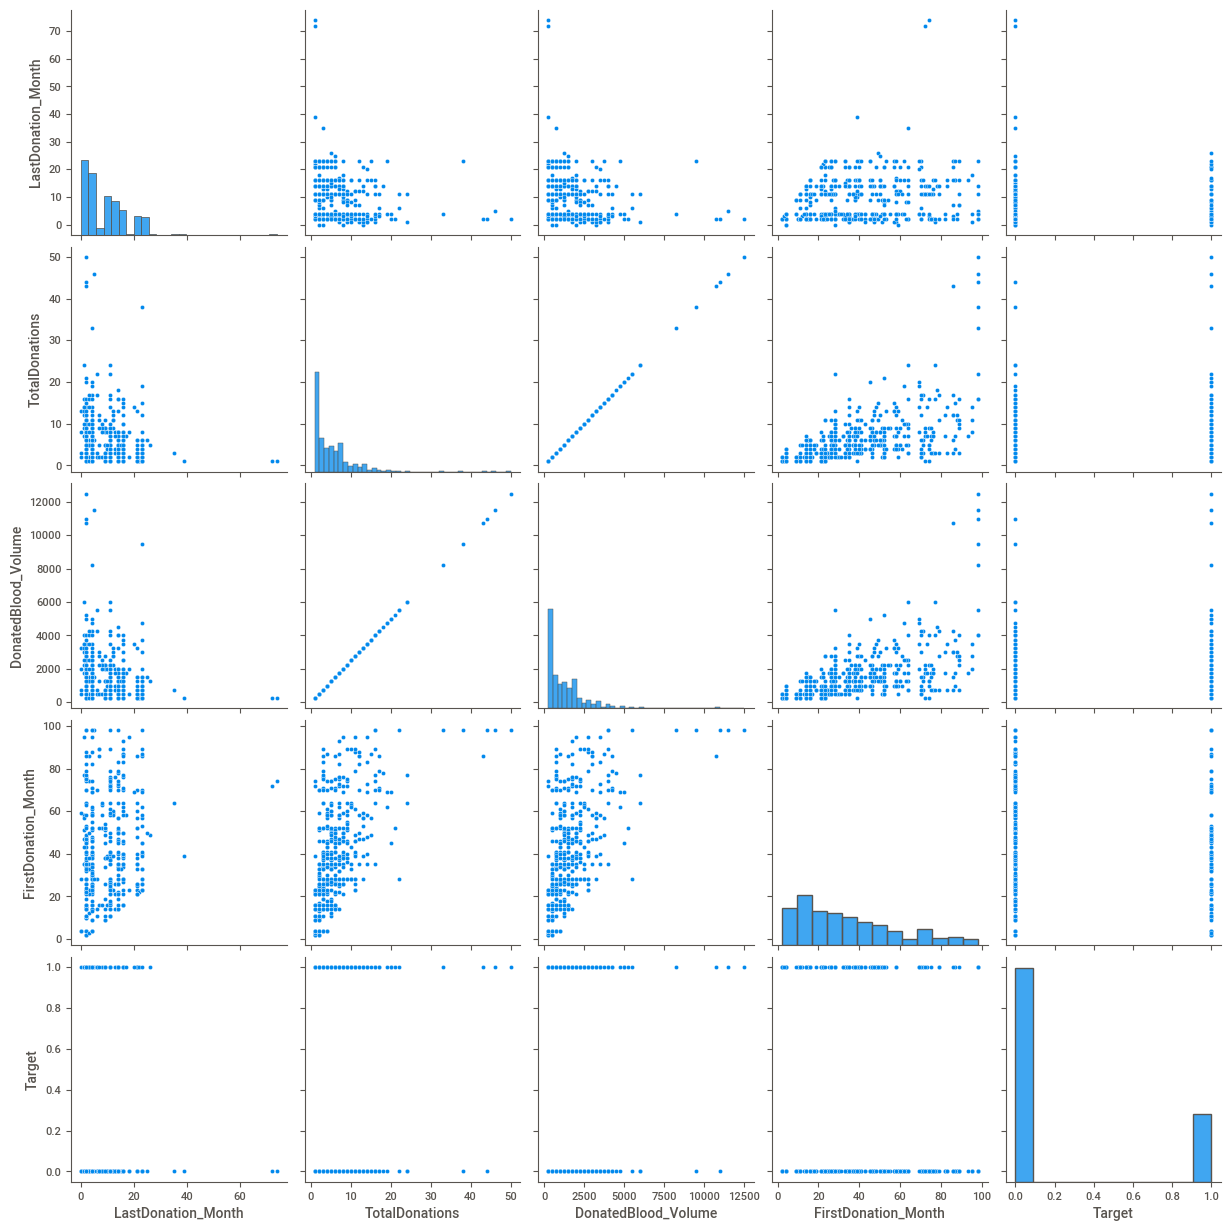

In [158]:
sns.pairplot(data=data.drop(columns='ID'))
plt.show()

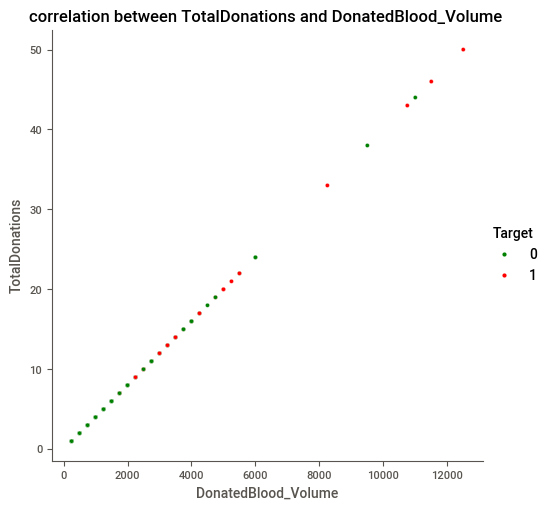

In [159]:
sns.relplot(x="DonatedBlood_Volume",y="TotalDonations",hue='Target',data=data,palette=['g','r'])
plt.title('correlation between TotalDonations and DonatedBlood_Volume ')
plt.show()

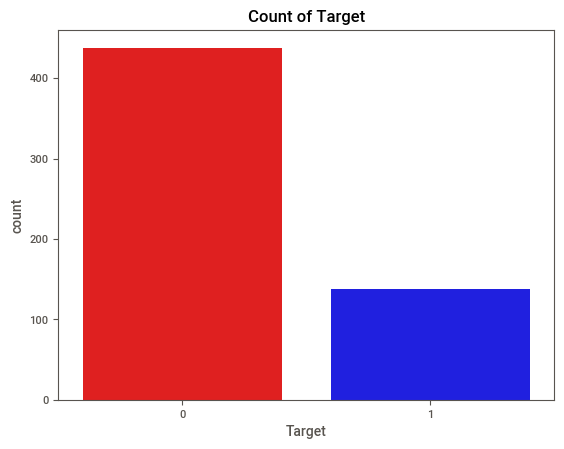

In [160]:
sns.countplot(x=data.Target,palette=['r','b'])
plt.title('Count of Target')
plt.show()

### INSIGHTS FROM EDA


1.Highly imbalanced data                            
2.positive is 24% and negative is 76%                                                                                           
3.TotalDonation and DonatedBlood_Volume are high correlated  

### FEATURE ENGINEERING

In [161]:
data.corr()

,ID,LastDonation_Month,TotalDonations,DonatedBlood_Volume,FirstDonation_Month,Target
ID,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
LastDonation_Month,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
TotalDonations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
DonatedBlood_Volume,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
FirstDonation_Month,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
Target,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


<Axes: >

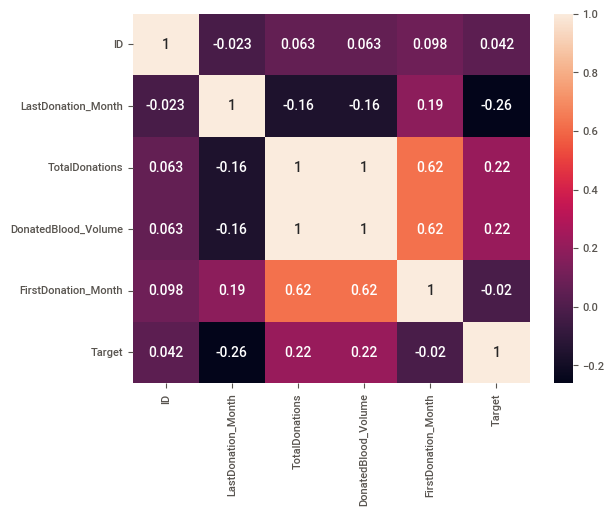

In [162]:
sns.heatmap(data.corr(),annot=True)

--> since TotalDonations and DonatedBlood_Volume are highly correlated . we can remove one of them
It appears that the first column is the ID number .
As the ID number doesn't contain any valuable information ,
we can remove that column

In [163]:
data.drop(columns=['ID','TotalDonations'],axis=1,inplace=True)

In [164]:
data

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month,Target
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
571,23,250,23,0
572,16,750,86,0
573,21,500,52,0
574,39,250,39,0


--> since the values are within the range of thousands .we don't need scalling process

### CHECKING FOR OUTLIERS

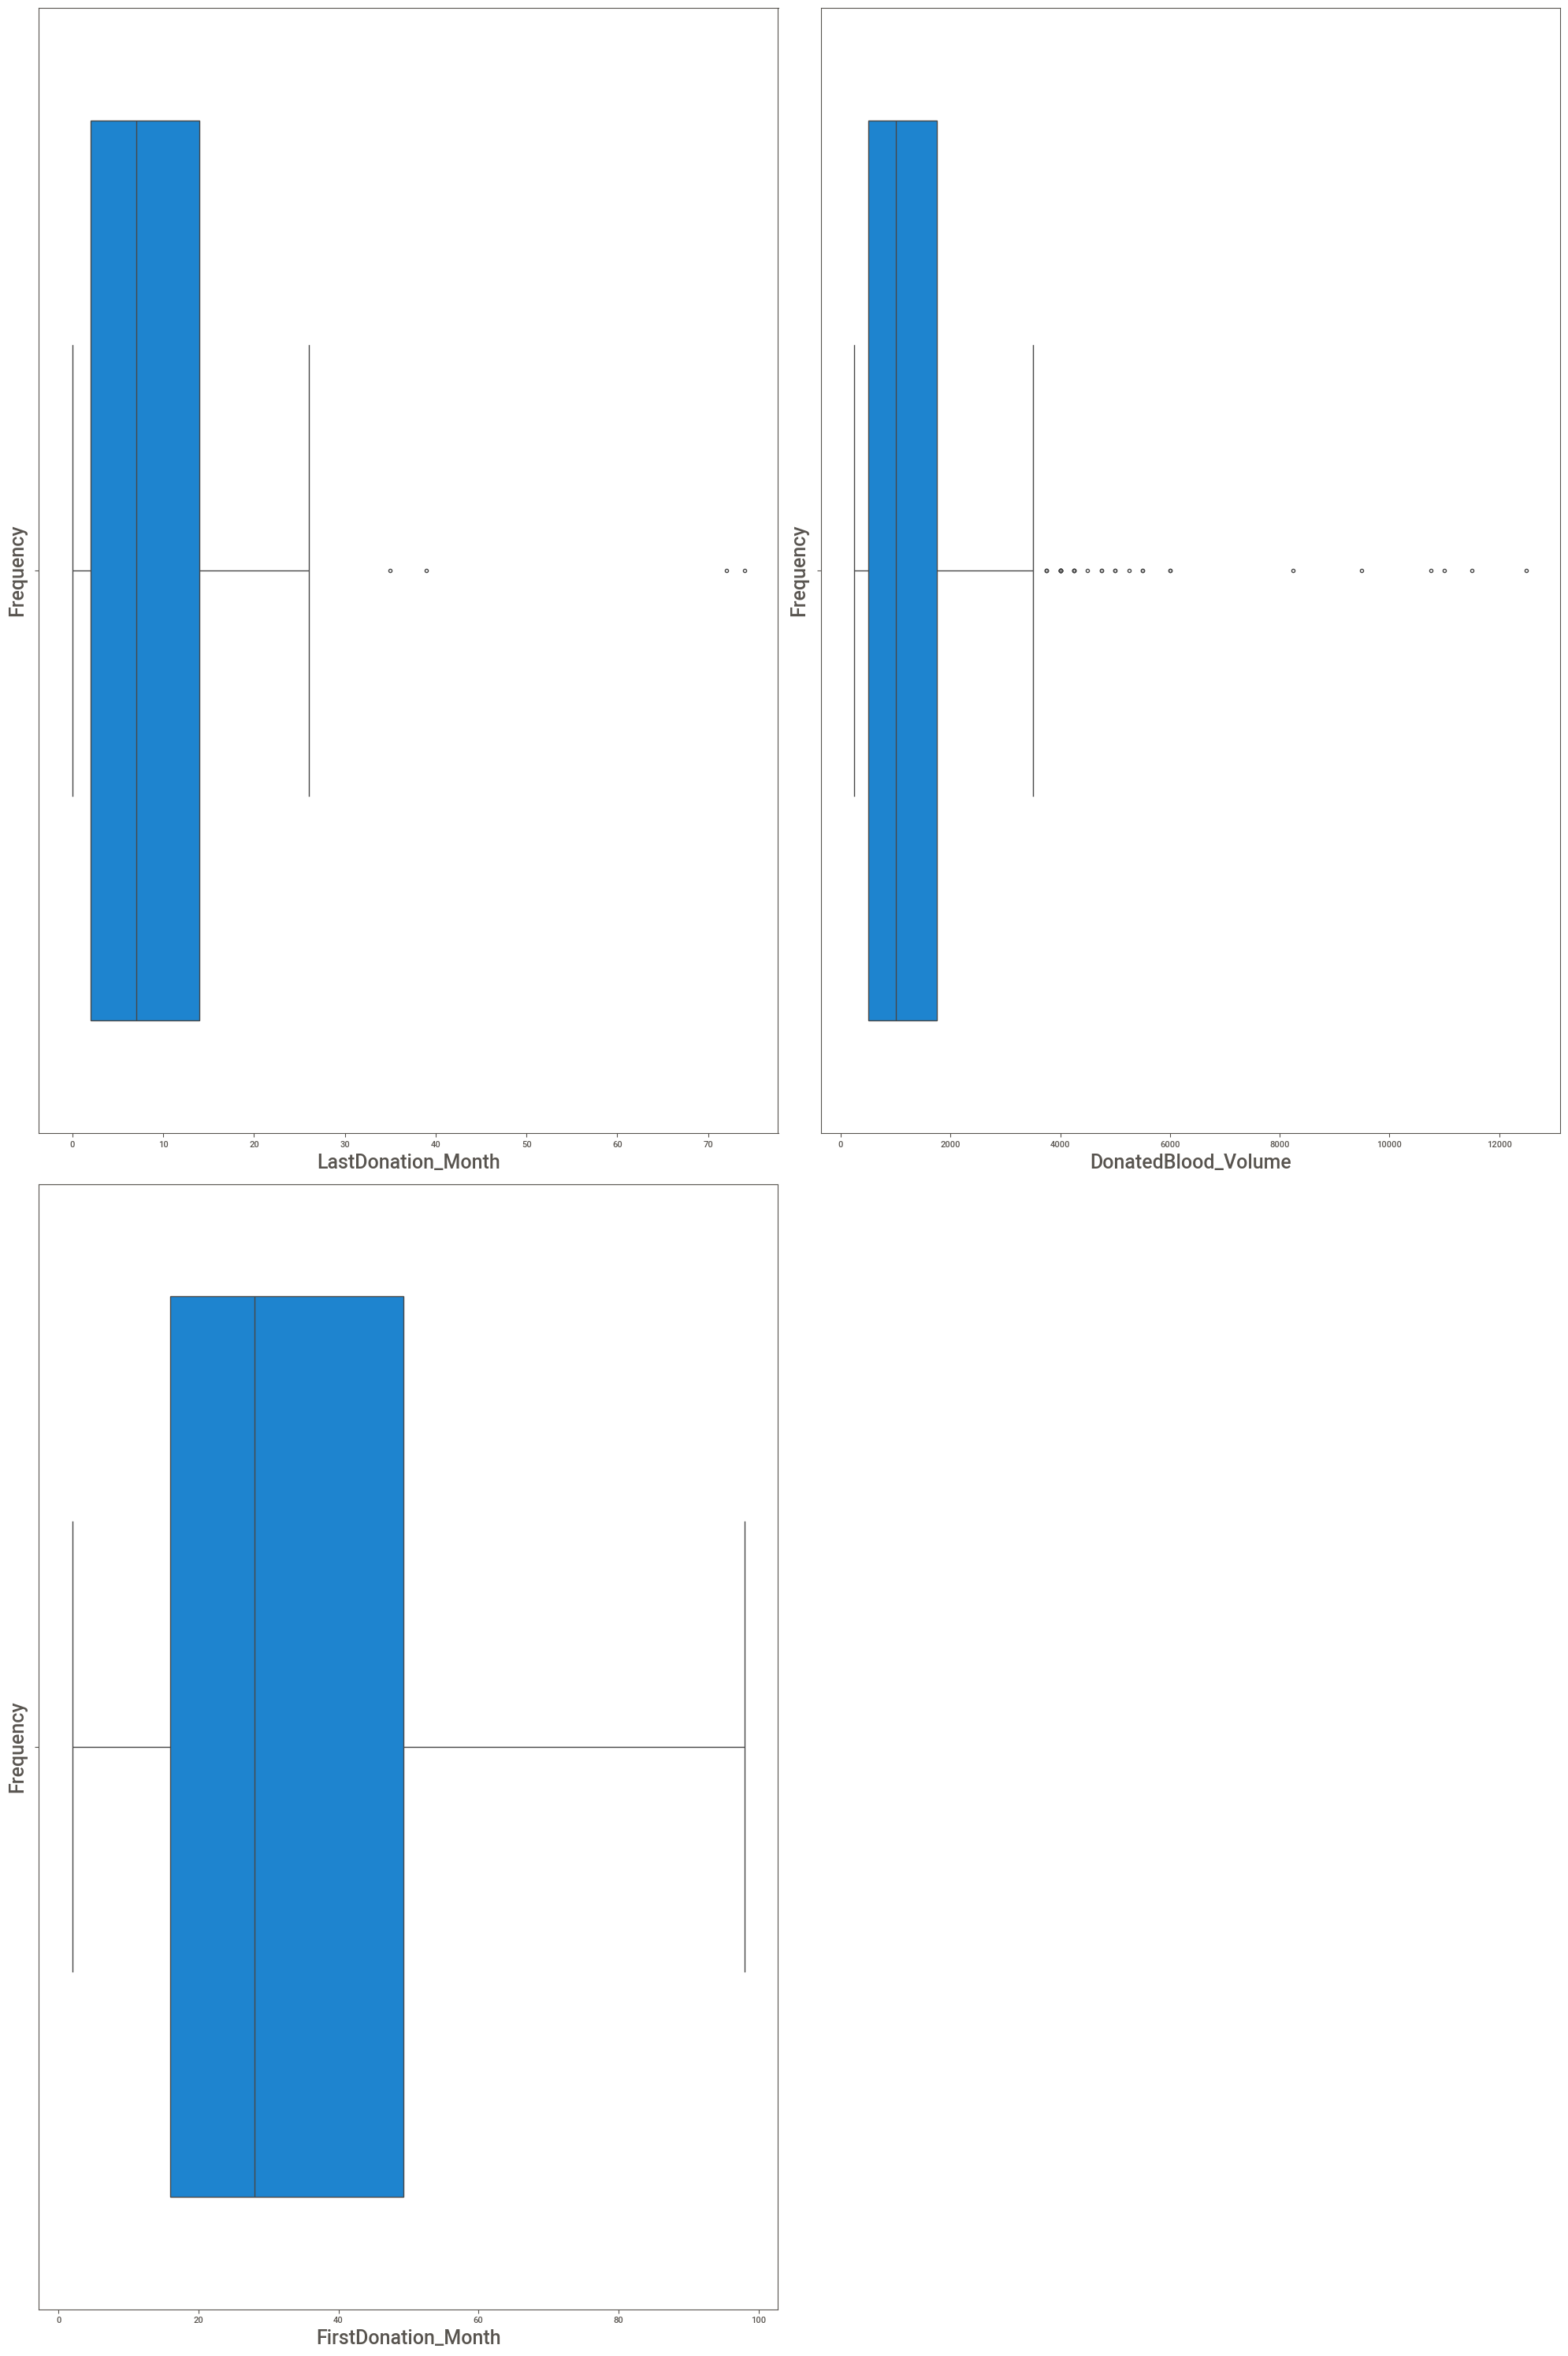

In [165]:
plt.figure(figsize =(20,30),facecolor = 'white')
plotnumber = 1
for i in data:
    if i != 'Target':
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(x=i,data=data)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Frequency',fontsize=18)
    plotnumber+=1
plt.tight_layout()

--> There are outliers in LastDonation_Month and DonatedBlood_Volume                                                          
--> since the data is imbalanced ,there is no need to remove the outliers                                                       
--> if we remove the outliers the dataset might get more imbalaced than before 

### HANDLING OUTLIERS

--> we are also implementing the model without outliers to see whether clearing outliers impact the outcome or not                                   
--> for that we are going to save the file as two datas                                                                         
--> first data contains outliers which is "data" and the second data is without the outliers which is "data1"

In [166]:
data.to_csv('file1.csv')

In [167]:
data1 = pd.read_csv('file1.csv')

In [168]:
data1

,Unnamed: 0,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month,Target
0,0,2,12500,98,1
1,1,0,3250,28,1
2,2,1,4000,35,1
3,3,2,5000,45,1
4,4,1,6000,77,0
...,...,...,...,...,...
571,571,23,250,23,0
572,572,16,750,86,0
573,573,21,500,52,0
574,574,39,250,39,0


### HANDLING OUTLIERS IN LastDonation_Month

In [169]:
data1.LastDonation_Month.loc[data1.LastDonation_Month<50].median()

7.0

In [170]:
data1.LastDonation_Month.loc[data.LastDonation_Month > 50] 

385    74
575    72
Name: LastDonation_Month, dtype: int64

In [171]:
data1.LastDonation_Month.loc[data.LastDonation_Month > 50] = data1.LastDonation_Month[data1.LastDonation_Month < 50].median()

<Axes: xlabel='LastDonation_Month'>

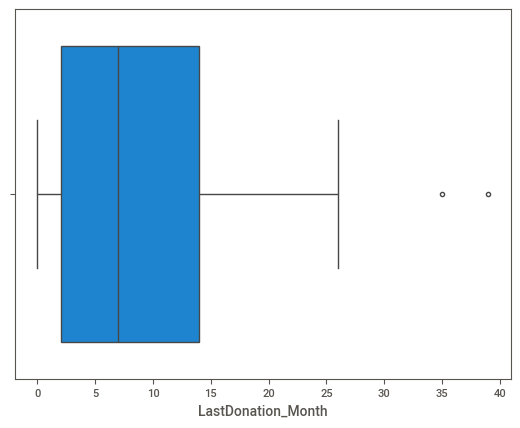

In [172]:
sns.boxplot(x='LastDonation_Month',data=data1)

### HANDLING OUTLIERS IN DonatedBlood_Volume

In [173]:
data1.DonatedBlood_Volume.loc[data1.DonatedBlood_Volume < 8000].median()

1000.0

In [174]:
data1.DonatedBlood_Volume.loc[data1.DonatedBlood_Volume > 8000] = data1.DonatedBlood_Volume.loc[data1.DonatedBlood_Volume < 8000].median()

<Axes: xlabel='DonatedBlood_Volume'>

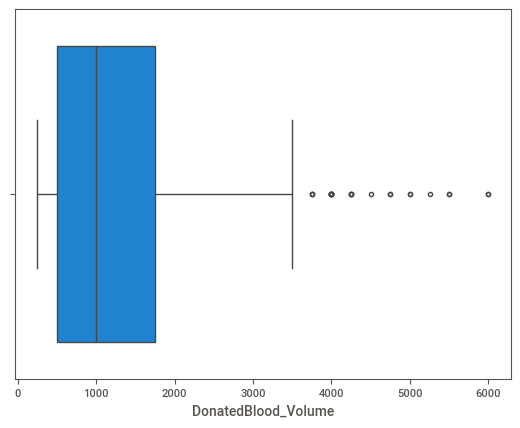

In [175]:
sns.boxplot(x='DonatedBlood_Volume',data=data1)

### CHECKING DATAS

In [176]:
data

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month,Target
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
571,23,250,23,0
572,16,750,86,0
573,21,500,52,0
574,39,250,39,0


In [177]:
data1

,Unnamed: 0,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month,Target
0,0,2,1000,98,1
1,1,0,3250,28,1
2,2,1,4000,35,1
3,3,2,5000,45,1
4,4,1,6000,77,0
...,...,...,...,...,...
571,571,23,250,23,0
572,572,16,750,86,0
573,573,21,500,52,0
574,574,39,250,39,0


In [178]:
data1.drop("Unnamed: 0",axis=1,inplace=True)

In [179]:
data1

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month,Target
0,2,1000,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
571,23,250,23,0
572,16,750,86,0
573,21,500,52,0
574,39,250,39,0


### MODEL CREATION

We can implement four models to this dataset with hyperparameter tuning:                                                       
1.Logistic Regression                                                                                                          
2.Support Vector Machine                                                                                                       
3.Decision Tree Classifier                                                                                                    
4.Random Forest Classifier


### MODEL - 1


### 1.LOGISTIC REGRESSION 

### WITH OUTLIER

In [180]:
X = data.loc[:,:'FirstDonation_Month']
X

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,12500,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [181]:
y = data.Target
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [183]:
data.Target.value_counts()
#since the data is highly imbalanced we will use smote to balance out the data

Target
0    438
1    138
Name: count, dtype: int64

In [184]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [185]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [186]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [187]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_smote,y_smote)

LogisticRegression()

In [188]:
y_hat=model1.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score

In [190]:
a = pd.crosstab(y_test,y_hat)
a

col_0,0,1
Target,,
0,62,51
1,5,26


In [191]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.55      0.69       113
           1       0.34      0.84      0.48        31

    accuracy                           0.61       144
   macro avg       0.63      0.69      0.59       144
weighted avg       0.80      0.61      0.64       144



### WITHOUT OUTLIERS

In [192]:
X1 = data1.loc[:,:'FirstDonation_Month']
X1

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,1000,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [193]:
y1 = data1.Target
y1

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [194]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1,random_state=3)

In [195]:
data1.Target.value_counts()

Target
0    438
1    138
Name: count, dtype: int64

In [196]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [197]:
X1_smote, y1_smote = smote.fit_resample(X1_train,y1_train)

In [198]:
from collections import Counter
print("Actual Classes",Counter(y1_train))
print("SMOTE Classes",Counter(y1_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [199]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X1_smote,y1_smote)

LogisticRegression()

In [200]:
y_hat1=model1.predict(X1_test)

In [201]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score

In [202]:
a = pd.crosstab(y1_test,y_hat1)
a

col_0,0,1
Target,,
0,58,55
1,4,27


In [203]:
print(classification_report(y1_test,y_hat1))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66       113
           1       0.33      0.87      0.48        31

    accuracy                           0.59       144
   macro avg       0.63      0.69      0.57       144
weighted avg       0.80      0.59      0.62       144



--> The outcome of with outlier data is high

### MODEL - 2

### 2.SUPPORT VECTOR MACHINE

### WITH OUTLIERS

In [204]:
X = data.loc[:,:'FirstDonation_Month']
X

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,12500,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [205]:
y = data.Target
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [207]:
data.Target.value_counts()

Target
0    438
1    138
Name: count, dtype: int64

In [208]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [209]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [210]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [211]:
#without tuning
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_smote, y_smote)

SVC()

In [212]:
y_hat=svclassifier.predict(X_test)

In [213]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74       113
           1       0.35      0.71      0.47        31

    accuracy                           0.65       144
   macro avg       0.62      0.67      0.61       144
weighted avg       0.77      0.65      0.68       144



In [214]:
a = pd.crosstab(y_test,y_hat)
a

col_0,0,1
Target,,
0,72,41
1,9,22


In [215]:
#with tuning
f1=f1_score(y_test,y_hat)
f1

0.4680851063829788

In [216]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 5, 10,20,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 42)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 0,scoring='f1',cv=5)
grid.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 20, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1')

In [217]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.001, 'random_state': 1}


In [218]:
clf=SVC(C=5, gamma=0.001,random_state=1)

In [219]:
clf.fit(X_smote, y_smote)

SVC(C=5, gamma=0.001, random_state=1)

In [220]:
y_clf=clf.predict(X_test)

In [221]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.33      0.48      0.39        31

    accuracy                           0.67       144
   macro avg       0.58      0.60      0.58       144
weighted avg       0.73      0.67      0.69       144



### WITHOUT OUTLIERS

In [222]:
X1 = data1.loc[:,:'FirstDonation_Month']
X1

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,1000,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [223]:
y1 = data1.Target
y1

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1,random_state=3)

In [225]:
data1.Target.value_counts()

Target
0    438
1    138
Name: count, dtype: int64

In [226]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [227]:
X1_smote, y1_smote = smote.fit_resample(X1_train,y1_train)

In [228]:
from collections import Counter
print("Actual Classes",Counter(y1_train))
print("SMOTE Classes",Counter(y1_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [229]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X1_smote, y1_smote)

SVC()

In [230]:
y_hat1=svclassifier.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score

In [232]:
print(classification_report(y1_test,y_hat1))

              precision    recall  f1-score   support

           0       0.87      0.59      0.71       113
           1       0.31      0.68      0.43        31

    accuracy                           0.61       144
   macro avg       0.59      0.64      0.57       144
weighted avg       0.75      0.61      0.65       144



In [233]:
a = pd.crosstab(y1_test,y_hat1)
a

col_0,0,1
Target,,
0,67,46
1,10,21


In [234]:
f1=f1_score(y1_test,y_hat1)
f1

0.4285714285714286

In [235]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 5, 10,20,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 42)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 0,scoring='f1',cv=5)
grid.fit(X1_smote,y1_smote)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 20, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1')

In [236]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.001, 'random_state': 1}


In [237]:
clf1=SVC(C=5, gamma=0.001,random_state=1)

In [238]:
clf1.fit(X1_smote, y1_smote)

SVC(C=5, gamma=0.001, random_state=1)

In [239]:
y_clf1=clf1.predict(X1_test)

In [240]:
print(classification_report(y1_test,y_clf1))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.33      0.48      0.39        31

    accuracy                           0.67       144
   macro avg       0.58      0.60      0.58       144
weighted avg       0.73      0.67      0.69       144



--> since both the outlier and without outlier data results in slight change in the model creation                              
--> we can ignore the without outlier data that is "data1"                                                                     
--> we can proceed with "data" only                                                                                             
--> The outcome of without outlier with hyperparameter tuning is high

### MODEL - 3

### 3. DECISION TREE

In [241]:
X = data.loc[:,:'FirstDonation_Month']
X

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,12500,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [242]:
y = data.Target
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [243]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [244]:
data.Target.value_counts()

Target
0    438
1    138
Name: count, dtype: int64

In [245]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [246]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [247]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [248]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_smote,y_smote)

DecisionTreeClassifier()

In [249]:
y_hat=dt.predict(X_test)

In [250]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score

In [251]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       113
           1       0.38      0.48      0.42        31

    accuracy                           0.72       144
   macro avg       0.61      0.63      0.62       144
weighted avg       0.74      0.72      0.73       144



In [252]:
f1=f1_score(y_test,y_hat)
f1

0.4225352112676056

In [253]:
from sklearn.model_selection import GridSearchCV
params = {
          "criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)),
         }
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=0, cv=3)
tree_cv.fit(X_smote,y_smote)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1')

In [254]:
print(tree_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [255]:
tree1= DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 1, min_samples_split = 3, splitter = 'random')

In [256]:
tree1.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       splitter='random')

In [257]:
tree2=tree1.predict(X_test)
tree2

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [258]:
print(classification_report(y_test,tree2))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       113
           1       0.37      0.55      0.44        31

    accuracy                           0.70       144
   macro avg       0.61      0.65      0.62       144
weighted avg       0.75      0.70      0.72       144



--> In Decision Tree the outcome is same for both with and without hyperparameter tuning

### MODEL - 4

### 4. RANDOM FOREST

In [259]:
X = data.loc[:,:'FirstDonation_Month']
X

,LastDonation_Month,DonatedBlood_Volume,FirstDonation_Month
0,2,12500,98
1,0,3250,28
2,1,4000,35
3,2,5000,45
4,1,6000,77
...,...,...,...
571,23,250,23
572,16,750,86
573,21,500,52
574,39,250,39


In [260]:
y = data.Target
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Target, Length: 576, dtype: int64

In [261]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [262]:
data.Target.value_counts()

Target
0    438
1    138
Name: count, dtype: int64

In [263]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [264]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [265]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


In [266]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_smote,y_smote)

RandomForestClassifier()

In [267]:
y_hat=rf.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score

In [269]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       113
           1       0.40      0.55      0.47        31

    accuracy                           0.73       144
   macro avg       0.63      0.66      0.64       144
weighted avg       0.76      0.73      0.74       144



In [270]:
f1=f1_score(y_test,y_hat)
f1

0.4657534246575342

In [271]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(X_smote,y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [272]:
print(rf_cv.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [273]:
rfc = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2,min_samples_leaf=1,max_depth= 10,bootstrap= False)
rfc.fit(X_smote, y_smote)
y_p=rfc.predict(X_test)
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       113
           1       0.38      0.58      0.46        31

    accuracy                           0.71       144
   macro avg       0.62      0.66      0.63       144
weighted avg       0.76      0.71      0.73       144



--> The outcome on hyperparameter tuning is better

### MODEL EVALUATION

In [274]:
models = {
    "LR":LogisticRegression(),
    "SVM":SVC(),
    "DTC":DecisionTreeClassifier(),
    "RFC":RandomForestClassifier(),
}


def score(models, X_smote, X_test, y_smote, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_smote, y_smote)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [275]:
model_scores = score(models=models,
                             X_smote=X_smote,
                             X_test=X_test,
                             y_smote= y_smote,
                             y_test=y_test)
model_scores

{'LR': 0.6111111111111112,
 'SVM': 0.6527777777777778,
 'DTC': 0.7291666666666666,
 'RFC': 0.7361111111111112}

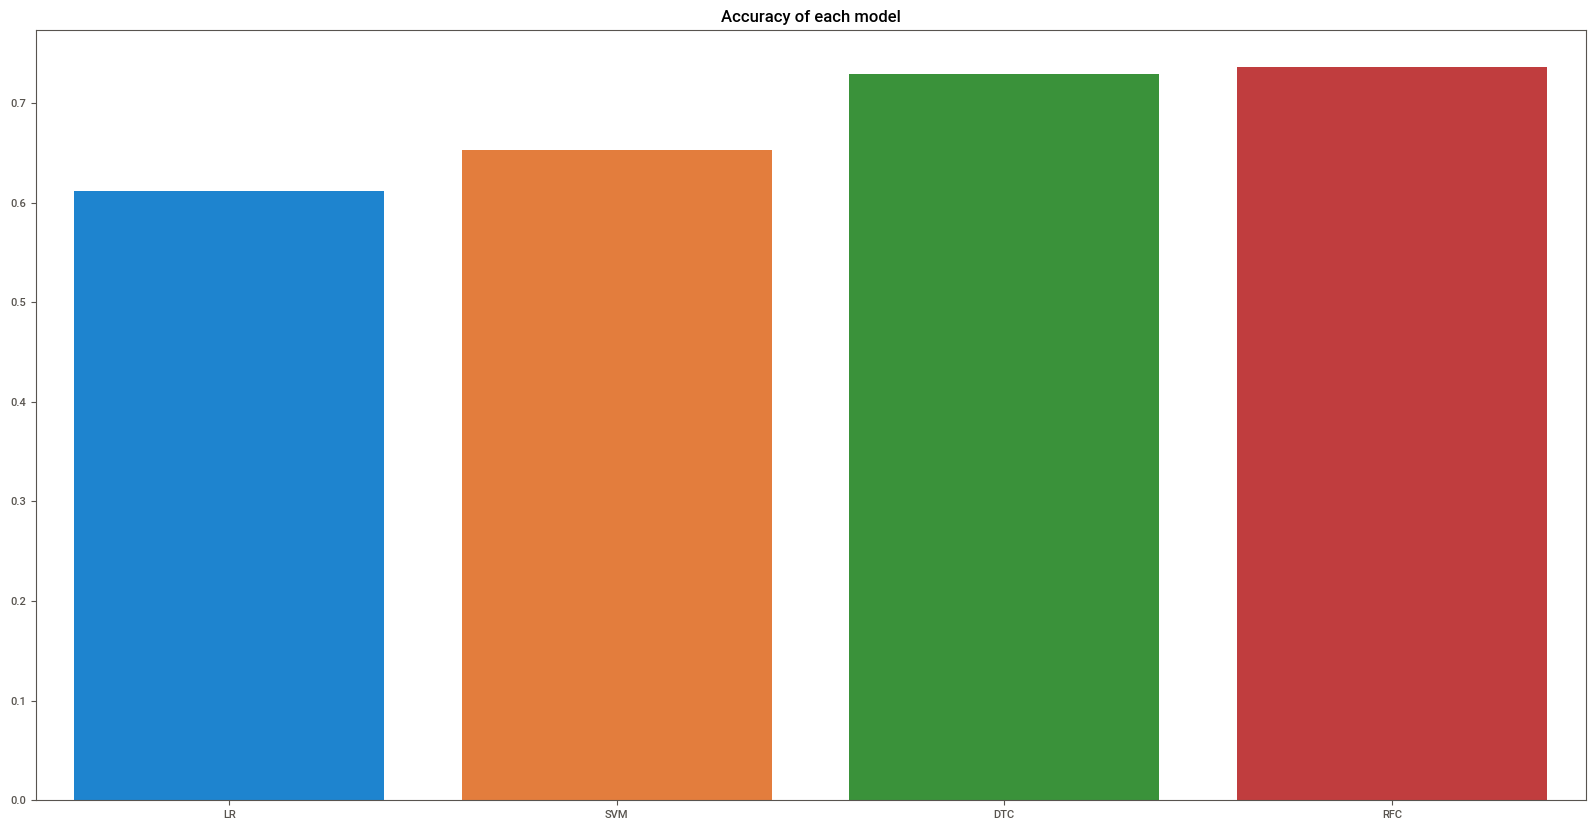

In [276]:
plt.figure(figsize = (20,10))
cm= pd.DataFrame(model_scores, index=["accuracy"])
sns.barplot(cm)
plt.title("Accuracy of each model")
plt.show()

In [277]:
print(cm)

                LR       SVM       DTC       RFC
accuracy  0.611111  0.652778  0.729167  0.736111


--> The accuracy of Random forest classifer is higher than the other models

### EVALUATION OF MODELS WITH CROSS VALIDATION SCORE

--> CROSS VALIDATIOB SCORE FOR RANDOM FOREST

In [278]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.48366013 0.         0.41463415]
Cross validation Score: 0.29943142568680586
Std : 0.21359702033883848


--> CROSS VALIDATIOB SCORE FOR DECISION TREE

In [279]:
scores = cross_val_score(tree1,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.50406504 0.15686275 0.43835616]
Cross validation Score: 0.36642798337733584
Std : 0.15059350567306823


--> CROSS VALIDATIOB SCORE FOR SVM

In [280]:
scores = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.45454545 0.04081633 0.33846154]
Cross validation Score: 0.27794110651253506
Std : 0.17424119270798338


--> CROSS VALIDATIOB SCORE FOR LOGISTIC REGRESSION

In [281]:
scores = cross_val_score(model1,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.61261261 0.         0.14814815]
Cross validation Score: 0.2535869202535869
Std : 0.2609745252961672


-->CROSS VALIDATION SCORES OF EACH MODEL                                                                                       
-->LR=0.26                                                                                                                     
-->SVM=0.17                                                                                                                     
-->DT=0.14                                                                                                                    
-->RF=0.21

### FINAL MODEL SELECTION

We have compared the performance of various algorithms.The data fit with 73% accuracy with the Random Forest Classifier.Hence RFC gives balanced accuracy in every measures and is considered as the best model with respect to our needs.Since the dataset was small,highly imbalanced and with very less features ,we have come to a conclusion that the above score that we obtained is the best.                                                                                                                       
BEST FIT MODEL = RANDOM FOREST CLASSIFIER